In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
data = loadmat("E:\MLNEW _BTM\ex7faces.mat")

In [3]:
X =data['X']

In [4]:
X.shape

(5000, 1024)

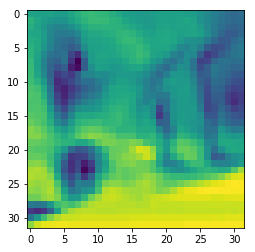

In [5]:
number = np.reshape(X[4300,:],(32,32))
plt.imshow(number)

In [6]:
def pca(X):
    X = (X-X.mean())/(X.std())
    X = np.matrix(X)
    cov = (X.T*X)/X.shape[0]
    U,S,V = np.linalg.svd(cov)
    return U,S,V

In [7]:
U,S,V = pca(X)

In [8]:
U,S,V

(matrix([[-0.01640988, -0.04222849, -0.0421747 , ...,  0.00078787,
           0.00059301,  0.00069988],
         [-0.01692408, -0.04109658, -0.04413594, ..., -0.0014743 ,
          -0.00159743, -0.00183183],
         [-0.01714767, -0.03963341, -0.04577663, ...,  0.00796443,
           0.00053733,  0.00152458],
         ..., 
         [-0.0085838 , -0.05826306,  0.04851035, ..., -0.00294466,
           0.00394326,  0.00497121],
         [-0.00680308, -0.06081527,  0.04664601, ...,  0.00038729,
          -0.00186067, -0.00185365],
         [-0.005765  , -0.06173977,  0.04483153, ...,  0.00228049,
           0.00058499,  0.00071138]]),
 array([  2.62189504e+02,   1.86275072e+02,   1.17780320e+02, ...,
          1.76409446e-04,   1.66475262e-04,   1.60785895e-04]),
 matrix([[-0.01640988, -0.01692408, -0.01714767, ..., -0.0085838 ,
          -0.00680308, -0.005765  ],
         [-0.04222849, -0.04109658, -0.03963341, ..., -0.05826306,
          -0.06081527, -0.06173977],
         [-0.0421747

In [9]:
def project_data(X,U,k):
    U_reduced = U[:,:k]
    X = np.matrix(X)
    return X*U_reduced

In [10]:
Z  = project_data(X,U,100)

In [11]:
Z.shape,X.shape

((5000, 100), (5000, 1024))

In [12]:
def recover(Z,U,k):
    U_reduced = U [:,:k]
    return np.dot(Z,U_reduced.T)

In [13]:
X_recoverd =  recover(Z,U,100)

In [14]:
X_recoverd.shape

(5000, 1024)

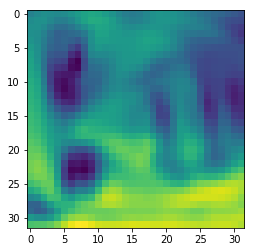

In [15]:
number = np.reshape(X_recoverd[4300,:],(32,32))
plt.imshow(number)